In [1]:
import random
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
#!pip3 install memory_profiler
%load_ext memory_profiler


In [2]:
def problem(N, seed=None):
    random.seed(seed)
    return list(sorted({
        tuple(set(random.randint(0, N - 1) for n in range(random.randint(N // 5, N // 2))))
        for n in range(random.randint(N, N * 5))})
    )

In [3]:
Individual= namedtuple('Individual',['genome','fitTuple']) 

def fitness_function(genome: list):
    '''Returns a tuple (number_of_covered_elements, -weigth)'''
    #this fitness function allows the precence of not optimal solution. The hierarchy of them shold be 
    # based at first of the #ofCoverdEl and then on the lighter
    num_covered_elements = set()
    weigth = 0
    for (i, list_) in enumerate(ALL_LISTS):
        if genome[i]:
            num_covered_elements.update(list_)
            weigth += len(list_)
    
    return len(num_covered_elements), -weigth #the reason why weight is negative is we want to minimize it

In [4]:

def tournament(population, tournament_size=2):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitTuple)


def cross_over(g1, g2):
    cut = random.randint(0, len(ALL_LISTS)-1)
    choice=random.randint(0,2)
    if choice==0:
        return g1[:cut] + g2[cut:]
    else:
        return g2[:cut] + g1[cut:]


def mutation(g):
    point = random.randint(0, len(ALL_LISTS) - 1)
    return g[:point] + (1 - g[point],) + g[point + 1 :]

def multiple_mutation(g):
    '''using multiple it's worse, because mutation should be small'''
    nflips=random.randint(1,100)
    for _ in range(nflips):
        g=mutation(g)
    return g

def vacuum_cleaner(g):
    '''takes some weight off by switching off a list'''
    temp_g=g
    for _ in range (random.randint(0,len(ALL_LISTS))):
        point=random.randint(0, len(ALL_LISTS) - 1)
        if temp_g[point] == 1:
            temp_g= temp_g[:point] + (0,) + temp_g[point + 1 :]
    return temp_g
    

def deClonizator(population):
    '''returns a population without duplicates'''
    unique_population=list()
    for individual in population:
        if individual not in unique_population:
            unique_population.append(individual)
    return unique_population




In [5]:

def GA(population, NUM_GENERATIONS, OFFSPRING_SIZE, mutation_rate,POPULATION_SIZE,cleaner_rate):
    start = time.time()                 #to take note of the computation time
    fittestIndividual=copy(population[0])
    for g in range(NUM_GENERATIONS):
        offspring = list()
        for i in range(OFFSPRING_SIZE): #generation of the offSprings
            if random.random() < mutation_rate:
                p = tournament(population)
                if g<NUM_GENERATIONS/cleaner_rate:
                    o= vacuum_cleaner(p.genome)
                else:
                    o = mutation(p.genome)
                #o = mutation(p.genome)
                   
            else:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)
            offspring.append(Individual(o, fitness_function(o)))
        population += offspring  #offspring added to the population
        
        #population=deClonizator(population)
        population=list(dict.fromkeys(population))  #deletion of duplicates
        
        population = sorted(population, key=lambda i: i.fitTuple, reverse=True)[:POPULATION_SIZE]  #cut the population to the original size
        if(population[0].fitTuple>fittestIndividual.fitTuple):  #copy the fittest individual
            fittestIndividual=copy(population[0])
    end = time.time()
    delta=format(end-start, '.2f')
    #fitCall=NUM_GENERATIONS*OFFSPRING_SIZE #take note of #ofFitnessFunctionCall
    #print( "time: " + str(delta)+ " fit call " + str(fitCall))
    print( "time: " + str(delta) + " fittest: " + str(fittestIndividual.fitTuple))
    return fittestIndividual

##Comparison between GA with cleaner and without it

In [6]:

def GAclean(population, NUM_GENERATIONS, OFFSPRING_SIZE, mutation_rate,POPULATION_SIZE,cleaner_rate):
    start = time.time()                 #to take note of the computation time
    fittestIndividual=copy(population[0])
    fitArray_=list()
    for g in range(NUM_GENERATIONS):
        offspring = list()
        for i in range(OFFSPRING_SIZE): #generation of the offSprings
            if random.random() < mutation_rate:
                p = tournament(population)
                if g<NUM_GENERATIONS/cleaner_rate:
                    o= vacuum_cleaner(p.genome)
                else:
                    o = mutation(p.genome)
                #o = mutation(p.genome)
                   
            else:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)
            offspring.append(Individual(o, fitness_function(o)))
        population += offspring  #offspring added to the population
        
        #population=deClonizator(population)
        population=list(dict.fromkeys(population))  #deletion of duplicates
        
        population = sorted(population, key=lambda i: i.fitTuple, reverse=True)[:POPULATION_SIZE]  #cut the population to the original size
        if g%100==0:
            fitArray_.append(copy(fittestIndividual.fitTuple[1]))
        if(population[0].fitTuple>fittestIndividual.fitTuple):  #copy the fittest individual
            fittestIndividual=copy(population[0])
    end = time.time()
    delta=format(end-start, '.2f')
    #fitCall=NUM_GENERATIONS*OFFSPRING_SIZE #take note of #ofFitnessFunctionCall
    #print( "time: " + str(delta)+ " fit call " + str(fitCall))
    print( "time: " + str(delta) + " fittest: " + str(fittestIndividual.fitTuple))
    return fittestIndividual,fitArray_


In [7]:
def GAnoClean(population, NUM_GENERATIONS, OFFSPRING_SIZE, mutation_rate,POPULATION_SIZE):
    start = time.time()                 #to take note of the computation time
    fittestIndividual=copy(population[0])
    fitArray_=list()
    for g in range(NUM_GENERATIONS):
        offspring = list()
        for i in range(OFFSPRING_SIZE): #generation of the offSprings
            if random.random() < mutation_rate:
                p = tournament(population)
                o = mutation(p.genome)
                #o = mutation(p.genome)
                   
            else:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)
            offspring.append(Individual(o, fitness_function(o)))
        population += offspring  #offspring added to the population
        
        #population=deClonizator(population)
        population=list(dict.fromkeys(population))  #deletion of duplicates
        
        population = sorted(population, key=lambda i: i.fitTuple, reverse=True)[:POPULATION_SIZE]  #cut the population to the original size
        if g%100==0:
            fitArray_.append(copy(fittestIndividual.fitTuple[1]))
        if(population[0].fitTuple>fittestIndividual.fitTuple):  #copy the fittest individual
            fittestIndividual=copy(population[0])
    end = time.time()
    delta=format(end-start, '.2f')
    fitCall=NUM_GENERATIONS*OFFSPRING_SIZE #take note of #ofFitnessFunctionCall
    #print( "time: " + str(delta)+ " fit call " + str(fitCall))
    print( "time: " + str(delta) + " fittest: " + str(fittestIndividual.fitTuple))
    return fittestIndividual,fitArray_


time: 4.91 fittest: (500, -1460)
time: 9.22 fittest: (500, -2323)
[-129941, -1480, -1460, -1460, -1460, -1460, -1460, -1460, -1460, -1460]
[-129941, -41641, -34870, -27636, -21250, -16377, -12214, -8871, -5626, -3747]


Text(0, 0.5, 'y - fittest')

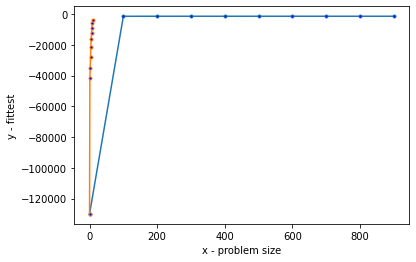

In [8]:
population_SIZE=20
PROBLEM_SIZE=500
OFFSPRING_SIZE=20
mutation_rate=0.5
cleaner_rate=10
NUM_GENERATIONS=1000
i=0
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()

population = list()

for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
    population.append(Individual(genome,fitness_function(genome)))

population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
fittest_ind,cleanFitArray=GAclean(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE,cleaner_rate)
fittest_ind,fitArray=GAnoClean(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE)
print(cleanFitArray)
print(fitArray)
range_=range(0,1000,100)
plt.plot(range_,cleanFitArray, fitArray,marker='o', markerfacecolor='blue', markersize=3)
plt.xlabel('x - problem size')
plt.ylabel('y - fittest')


##GA strategy2

In [9]:
def GAstrategy2(population, NUM_GENERATIONS, OFFSPRING_SIZE, mutation_rate,POPULATION_SIZE,cleaner_rate):
    start = time.time()                 #to take note of the computation time
    fittestIndividual=copy(population[0])
    for g in range(NUM_GENERATIONS):
        for i in range(OFFSPRING_SIZE):
            o=0
            if random.random() < mutation_rate:
                p = tournament(population)
                if g<NUM_GENERATIONS/cleaner_rate:
                    o= vacuum_cleaner(p.genome)
                else:
                    o = mutation(p.genome)
            if random.random() < 0.5:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)
            if o:                
                population.append(Individual(o, fitness_function(o)))
                population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
                del population[-1] 
            #in the strategy2 the population is cut every time we add a new individual
        
        #population=deClonizator(population)
        population=list(dict.fromkeys(population))  #deletion of duplicates

        if(population[0].fitTuple>fittestIndividual.fitTuple):
            fittestIndividual=copy(population[0])
    end = time.time()
    delta=format(end-start, '.2f')
    #fitCall=NUM_GENERATIONS*OFFSPRING_SIZE #take note of #ofFitnessFunctionCall
    #print( "time: " + str(delta)+ " fit call " + str(fitCall))
    print( "time: " + str(delta) + " fittest: " + str(fittestIndividual.fitTuple))
    return fittestIndividual


##Vary the population size

time: 4.08 fittest: (500, -1951)
time: 3.98 fittest: (500, -1688)
time: 3.92 fittest: (500, -1668)
time: 4.06 fittest: (500, -1644)
time: 4.49 fittest: (500, -1655)
time: 5.20 fittest: (500, -1591)
time: 6.43 fittest: (500, -1572)


Text(0, 0.5, 'y - fittest')

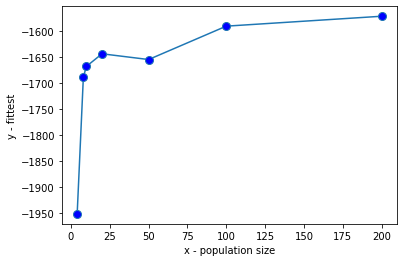

In [10]:
population_SIZE=[4,8,10,20,50,100,200]
PROBLEM_SIZE=500
OFFSPRING_SIZE=20
mutation_rate=0.3
cleaner_rate=20
NUM_GENERATIONS=1000
N=3
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for pop_size in population_SIZE:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(pop_size)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,pop_size,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(population_SIZE,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - population size')
# naming the y axis
plt.ylabel('y - fittest')


##Vary the offspring size

time: 1.06 fittest: (500, -1799)
time: 2.17 fittest: (500, -1663)
time: 4.15 fittest: (500, -1632)
time: 8.17 fittest: (500, -1769)
time: 9.83 fittest: (500, -1685)


Text(0, 0.5, 'y - fittest')

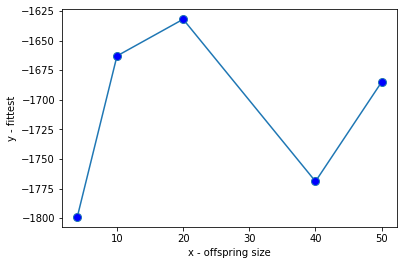

In [11]:
population_SIZE=20
PROBLEM_SIZE=500
OFFSPRING_SIZE=[4,10,20,40,50]
mutation_rate=0.3
cleaner_rate=20
NUM_GENERATIONS=1000
N=3
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for off_size in OFFSPRING_SIZE:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,off_size,mutation_rate,population_SIZE,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(OFFSPRING_SIZE,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - offspring size')
# naming the y axis
plt.ylabel('y - fittest')


##Vary the mutation rate

time: 4.56 fittest: (500, -1642)
time: 5.09 fittest: (500, -1704)
time: 4.60 fittest: (500, -1629)
time: 4.61 fittest: (500, -1509)
time: 4.79 fittest: (500, -1609)


Text(0, 0.5, 'y - fittest')

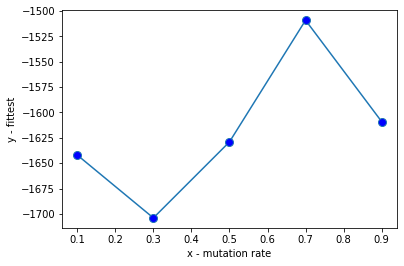

In [12]:
population_SIZE=20
PROBLEM_SIZE=500
OFFSPRING_SIZE=20
mutation_rate=[0.1,0.3,0.5,0.7,0.9]
cleaner_rate=20
NUM_GENERATIONS=1000
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for mut in mutation_rate:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mut,population_SIZE,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(mutation_rate,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - mutation rate')
# naming the y axis
plt.ylabel('y - fittest')


##Vary the cleaner rate

time: 5.07 fittest: (500, -1595)
time: 4.51 fittest: (500, -1607)
time: 4.26 fittest: (500, -1736)
time: 4.20 fittest: (500, -1795)
time: 4.09 fittest: (500, -1777)
time: 4.07 fittest: (500, -1724)


Text(0, 0.5, 'y - fittest')

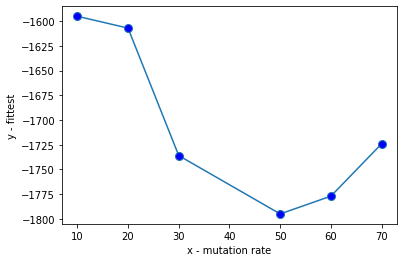

In [13]:
population_SIZE=20
PROBLEM_SIZE=500
OFFSPRING_SIZE=20
mutation_rate=0.7
cleaner_rate=[10,20,30,50,60,70]
NUM_GENERATIONS=1000
ALL_LISTS=problem(PROBLEM_SIZE,42)
fittest=list()
i=0
for clean_ in cleaner_rate:
    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE,clean_)
    fittest.append(fittest_ind.fitTuple[1])
plt.plot(cleaner_rate,fittest, marker='o', markerfacecolor='blue', markersize=8)
plt.xlabel('x - mutation rate')
# naming the y axis
plt.ylabel('y - fittest')

##Final trial

To let the computation be feasible have been chosen small but decent value of population and offspring size instead of the best ones 

In [14]:
population_SIZE=20
PROBLEM_SIZE=[5,10,20,100,500,1000,2000]
PROBLEM_SIZE_=[5000,10000]
PROBLEM_SIZE_=[20000,50000] #unfeasible
OFFSPRING_SIZE=20
mutation_rate=0.5
cleaner_rate=10
NUM_GENERATIONS=1000
for prbl_size in PROBLEM_SIZE:
    ALL_LISTS=problem(prbl_size,42)
    fittest=list()

    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    %memit fittest_ind=GA(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE,cleaner_rate)



time: 0.15 fittest: (5, -5)
time: 0.15 fittest: (5, -5)
peak memory: 130.32 MiB, increment: 0.19 MiB
time: 0.21 fittest: (10, -10)
time: 0.21 fittest: (10, -10)
peak memory: 130.09 MiB, increment: -0.23 MiB
time: 0.21 fittest: (20, -23)
time: 0.21 fittest: (20, -28)
peak memory: 130.11 MiB, increment: 0.02 MiB
time: 1.04 fittest: (100, -229)
peak memory: 130.44 MiB, increment: 0.29 MiB
time: 4.65 fittest: (500, -1460)
peak memory: 136.55 MiB, increment: 1.08 MiB
time: 10.59 fittest: (1000, -3728)
peak memory: 166.24 MiB, increment: 0.80 MiB
time: 29.00 fittest: (2000, -9209)
peak memory: 284.47 MiB, increment: 4.73 MiB


##Strategy2

In [15]:
population_SIZE=20
PROBLEM_SIZE=[5,10,20,100,500,1000,2000]
PROBLEM_SIZE_=[5000,10000]
OFFSPRING_SIZE=20
mutation_rate=0.3
cleaner_rate=10
NUM_GENERATIONS=1000
i=0
for prbl_size in PROBLEM_SIZE:
    ALL_LISTS=problem(prbl_size,42)
    fittest=list()

    population = list()

    for genome in [tuple([random.choice([1, 0]) for _ in range(len(ALL_LISTS))]) for _ in range(population_SIZE)]:
        population.append(Individual(genome,fitness_function(genome)))

    population = sorted(population, key=lambda i: i.fitTuple, reverse=True)
    %memit fittest_ind=GAstrategy2(population,NUM_GENERATIONS,OFFSPRING_SIZE,mutation_rate,population_SIZE,cleaner_rate)
    fittest.append(fittest_ind.fitTuple[1])


time: 0.11 fittest: (5, -5)
time: 0.11 fittest: (5, -5)
peak memory: 130.55 MiB, increment: -4.09 MiB
time: 0.17 fittest: (10, -13)
time: 0.16 fittest: (10, -14)
peak memory: 130.46 MiB, increment: -0.09 MiB
time: 0.18 fittest: (20, -31)
time: 0.16 fittest: (20, -33)
peak memory: 130.48 MiB, increment: 0.02 MiB
time: 0.69 fittest: (100, -263)
peak memory: 130.81 MiB, increment: 0.20 MiB
time: 3.11 fittest: (500, -1939)
peak memory: 136.32 MiB, increment: 0.73 MiB
time: 7.53 fittest: (1000, -4114)
peak memory: 166.02 MiB, increment: 0.00 MiB
time: 18.02 fittest: (2000, -9438)
peak memory: 281.43 MiB, increment: 1.66 MiB
